In [231]:
import sys
import pandas as pd

file = open('out_mpi_merge.txt')
df = pd.DataFrame()
dict_temp = {}
for line in file:
    if ':' in line:
        if 'Processo:' in line:
            key = line.replace(':','_')
        if 'Processo'in key:
            value = line.split(':')[1].split('\n')[0]
            dict_temp[key] = value
        else:
            key = line.split(':')[0]
            value = line.split(':')[1].replace('\n','')
            dict_temp[key] = value
            
    elif 'm' in line:
        key = line.split('\t')[0]
        value = line.split('m')[1].split('s')[0].replace(',','.')
        dict_temp[key] = float(value)
        if "sys" in line:
            df = df.append(dict_temp, ignore_index=True)
            dict_temp = dict.fromkeys(dict_temp, 0)

df = df.drop(columns = ['world_rank','sys','user'])
col = df['real']
df.drop(labels=['real'], axis=1,inplace = True)
df.insert(0, 'real', col)
col = df['Tamanho do Chunk']
df.drop(labels=['Tamanho do Chunk'], axis=1,inplace = True)
df.insert(0, 'Tamanho do Chunk', col)
col = df['Tamanho do vetor']
df.drop(labels=['Tamanho do vetor'], axis=1,inplace = True)
df.insert(0, 'Tamanho do vetor', col)
col = df['world size']
df.drop(labels=['world size'], axis=1,inplace = True)
df.insert(0, 'world size', col)
df['world size'] = df['world size'].astype(int)

In [179]:
df.columns

Index(['world size', 'Tamanho do vetor', 'Tamanho do Chunk', 'real',
       'Processo_0\n', 'Processo_1\n', 'Processo_2\n', 'Processo_3\n'],
      dtype='object')

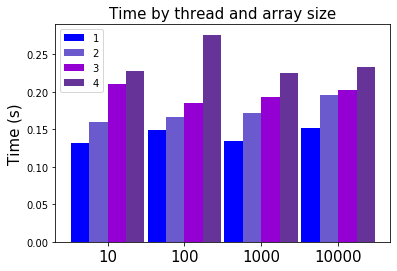

In [286]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.24       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
time_w1 = df[df['world size'] == 1]['real']
rects1 = ax.bar(ind, time_w1, width, color='blue')

time_w2 = df[df['world size'] == 2]['real']
rects2 = ax.bar(ind+width, time_w2, width, color='slateblue')

time_w3 = df[df['world size'] == 3]['real']
rects3 = ax.bar(ind+width*2, time_w3, width, color='darkviolet')

time_w4 = df[df['world size'] == 4]['real']
rects4 = ax.bar(ind+width*3, time_w4, width, color='rebeccapurple')

# add some
ax.set_ylabel('Time (s)',size = 15)
ax.set_title('Time by thread and array size', size=15)
ax.set_xticks(ind + width*3/2)
ax.set_xticklabels( ('10', '100', '1000', '10000'), size = 15 )

ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0]), ('1', '2','3','4') )

plt.show()